In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
sh=pd.read_csv(r'C:\Users\YcAllenEffy\Desktop\vgsales.csv')
df=sh
df

,排名,游戏名,平台,发行年份,游戏类型,发行商,北美,欧洲,日本,其他,全球
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16321,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16322,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16323,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16324,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
#设置画图 中文字体初始化
sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

###    下载并读取销售数据，完成以下需求：
    1. 创建曲线图，展示发行商 Nintendo 在北美地区的游戏销售分布情况，显示曲线阴影；
    2. 创建曲线图，展示发行时间是2010年，欧洲地区的游戏销售分布情况，显示曲线阴影

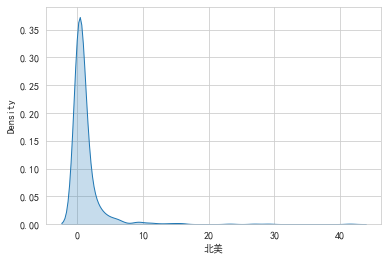

In [7]:
df1=df[df['发行商']=='Nintendo']
df2=df[df['发行年份']==2010]
sns.kdeplot(data=df1,x='北美',shade=True)

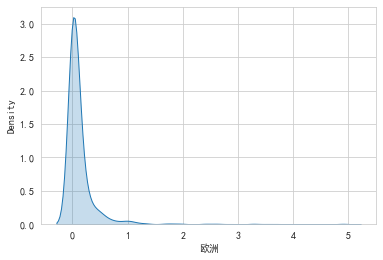

In [9]:
sns.kdeplot(data=df2,x='欧洲',shade=True)

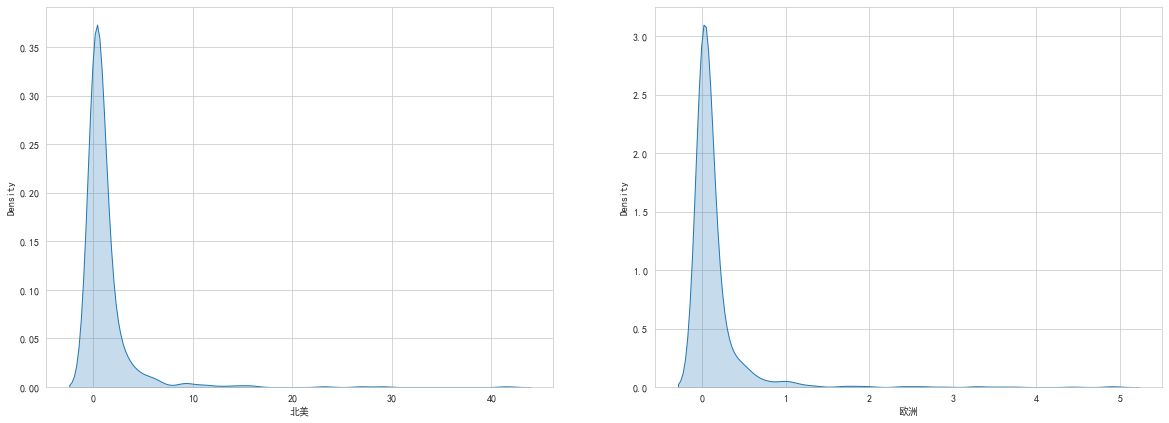

In [10]:
# 标准答案
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

df =sh

df_na = df[df['发行商']=='Nintendo']
df_eu = df[df['发行年份']==2010]

fig, axs = plt.subplots(1, 2, figsize=(20, 7))
sns.kdeplot( data=df_na, x='北美', shade=True, ax=axs[0])
sns.kdeplot( data=df_eu, x='欧洲', shade=True, ax=axs[1]);

###     下载并读取销售数据，完成以下需求：

    创建4个曲线图，分别展示“全球总销售额”排名前4的发行商的“北美销量”分布情况，显示曲线阴影。

In [34]:
df3=df.groupby('发行商').sum()
top4=df3.sort_values('全球',ascending=False).head(4).index
top4

Index(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment'],
      dtype='object', name='发行商')

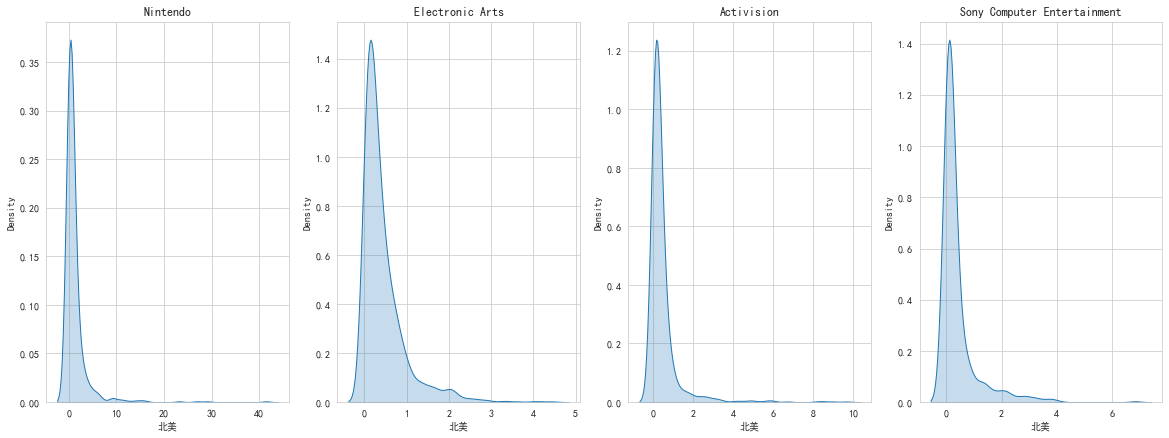

In [37]:

fig, axs = plt.subplots(1, 4, figsize=(20, 7))
k=0
for i in top4:
    df_x=df[df['发行商']==i]
    g=sns.kdeplot(data=df_x,x='北美',shade=True,ax=axs[k])
    g.set_title( i )
    k+=1

,排名,游戏名,平台,发行年份,游戏类型,发行商,北美,欧洲,日本,其他,全球
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
52,53,Gran Turismo,PS,1997,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
54,55,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
66,67,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
...,...,...,...,...,...,...,...,...,...,...,...
15919,16184,Resistance Dual Pack,PS3,2011,Shooter,Sony Computer Entertainment,0.00,0.01,0.00,0.00,0.01
15926,16191,Toro to Morimori,PS3,2009,Misc,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16063,16335,The Eye of Judgment: Legends,PSP,2010,Strategy,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
16133,16406,Ratchet & Clank: Full Frontal Assault,PSV,2012,Adventure,Sony Computer Entertainment,0.01,0.00,0.00,0.00,0.01


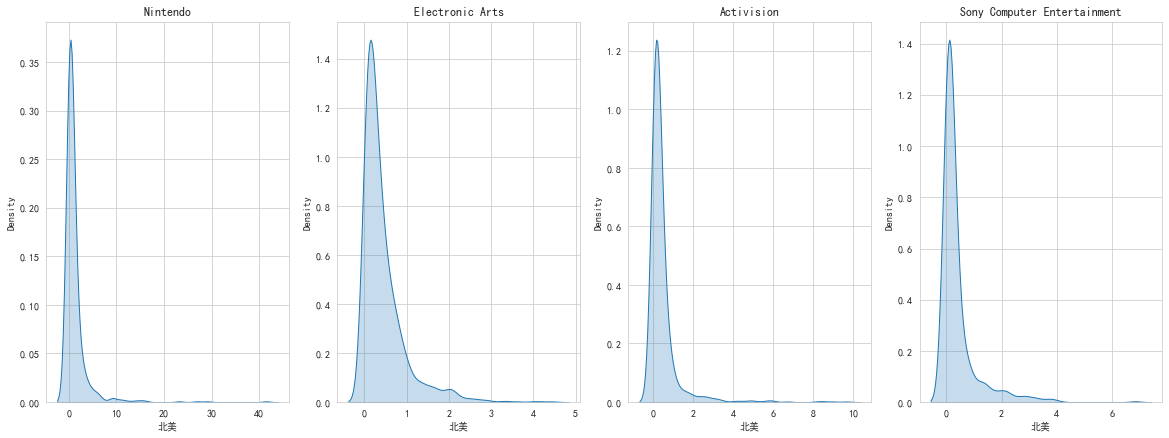

In [29]:
# 标准答案
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})

df = sh

df_gb = df.groupby('发行商')[['全球']].sum().sort_values('全球', ascending=False)[:4]

fig, axs = plt.subplots(1, 4, figsize=(20, 7))
for i in range(4):
    publisher = df_gb.index[i]
    df_t = df[ df['发行商'] ==  publisher]
    g = sns.kdeplot( data=df_t, x='北美', shade=True, ax=axs[i])
    g.set_title( publisher )

df_t

###     下载并读取销售数据，完成以下需求：

    创建累计分布曲线图，展示发行时间是1989年，北美、欧洲、日本、其他等4列销售额的分布情况，显示曲线阴影。

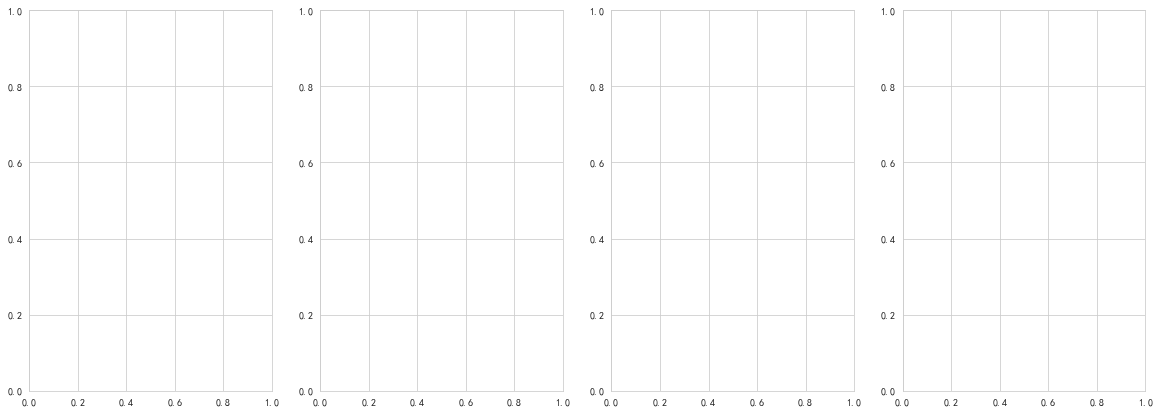

D:\CODE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\CODE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


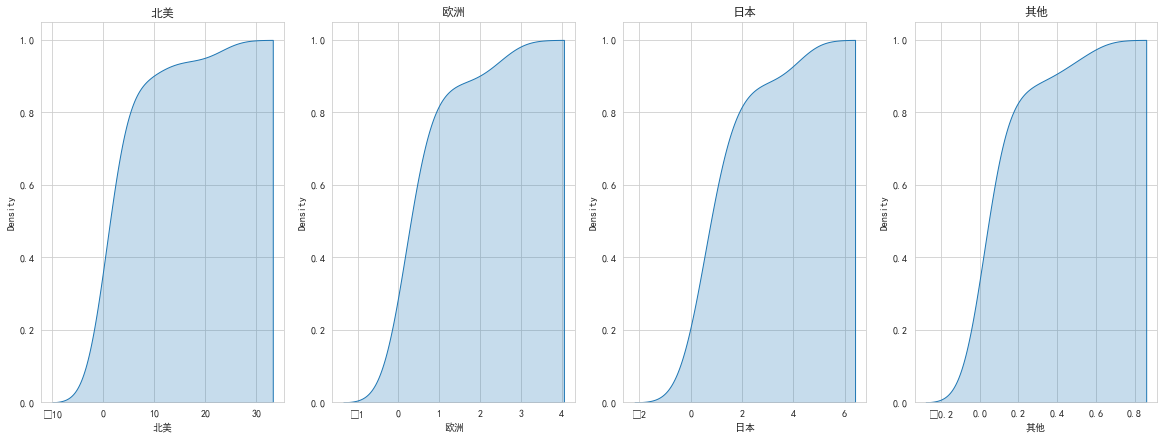

In [48]:
fig, axs = plt.subplots(1, 4, figsize=(20, 7))
df_1989=df[df['发行年份']==1989]
col=['北美','欧洲','日本','其他']
k=0
for i in col:
    g=sns.kdeplot(data=df_1989,x=i,ax=axs[k],shade=True,cumulative=True)
    g.set_title( i)
    k+=1

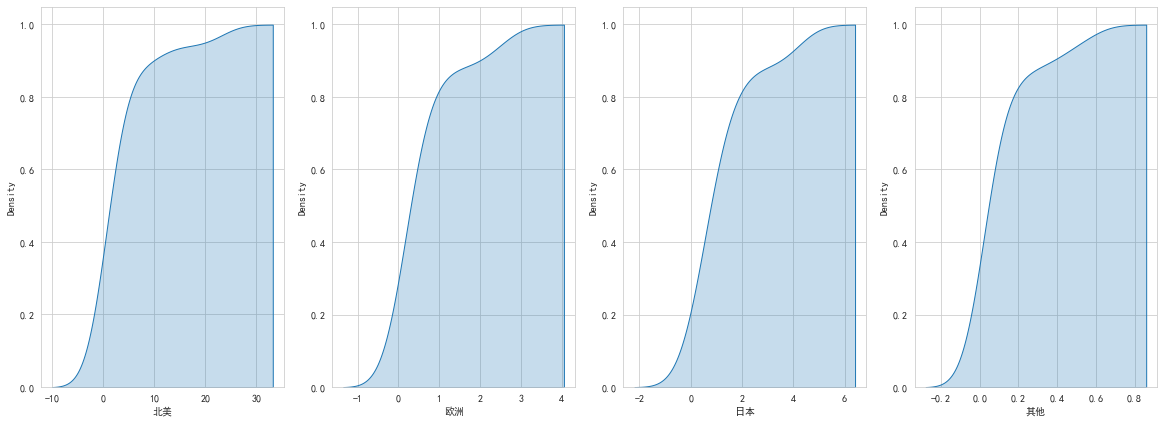

In [49]:
# 标准答案
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

df =sh

df_year = df[df['发行年份']==1989]

fig, axs = plt.subplots(1, 4, figsize=(20, 7))
sns.kdeplot( data=df_year, x='北美', shade=True, cumulative=True, ax=axs[0])
sns.kdeplot( data=df_year, x='欧洲', shade=True, cumulative=True, ax=axs[1])
sns.kdeplot( data=df_year, x='日本', shade=True, cumulative=True, ax=axs[2])
sns.kdeplot( data=df_year, x='其他', shade=True, cumulative=True, ax=axs[3]);

###     下载并读取销售数据，完成以下需求：

    1. 分别使用“概率密度曲线”和“累计分布曲线”展示SCD平台的全球销售情况分布，显示曲线阴影；

    2. 分别使用“概率密度曲线”和“累计分布曲线”展示 NG平台的全球销售情况分布，显示曲线阴影。

In [51]:
df_scd=df[df['平台']=='SCD']
df_ng=df[df['平台']=='NG']


,排名,游戏名,平台,发行年份,游戏类型,发行商,北美,欧洲,日本,其他,全球
6578,6683,Samurai Shodown II,NG,1994,Fighting,SNK,0.0,0.0,0.25,0.0,0.25
6933,7047,The King of Fighters '95 (CD),NG,1994,Fighting,SNK,0.0,0.0,0.23,0.0,0.23
7378,7500,The King of Fighters '95,NG,1995,Fighting,SNK,0.0,0.0,0.20,0.0,0.20
7433,7555,Samurai Spirits (CD),NG,1994,Fighting,SNK,0.0,0.0,0.20,0.0,0.20
9052,9198,The King of Fighters '94 (CD),NG,1993,Fighting,SNK,0.0,0.0,0.14,0.0,0.14
9566,9719,The King of Fighters '94,NG,1994,Fighting,SNK,0.0,0.0,0.12,0.0,0.12
11325,11507,Samurai Shodown III,NG,1995,Fighting,SNK,0.0,0.0,0.08,0.0,0.08
11895,12086,Samurai Shodown,NG,1993,Fighting,SNK,0.0,0.0,0.07,0.0,0.07
12584,12789,The King of Fighters '96,NG,1996,Fighting,SNK,0.0,0.0,0.06,0.0,0.06
13696,13916,Art of Fighting 3: The Path of the Warrior,NG,1996,Fighting,SNK,0.0,0.0,0.04,0.0,0.04


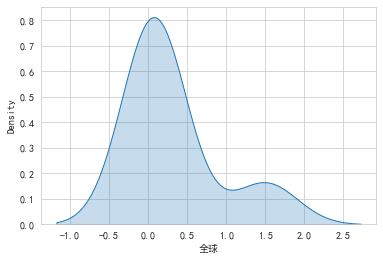

In [52]:
sns.kdeplot(data=df_scd,x='全球',shade=True)

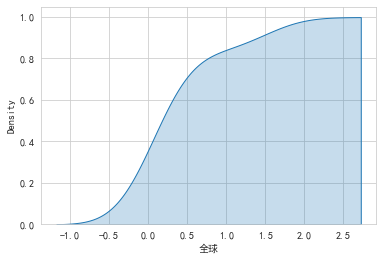

In [53]:
sns.kdeplot(data=df_scd,x='全球',shade=True,cumulative=True)

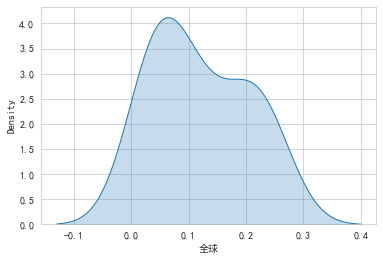

In [54]:
sns.kdeplot(data=df_ng,x='全球',shade=True)

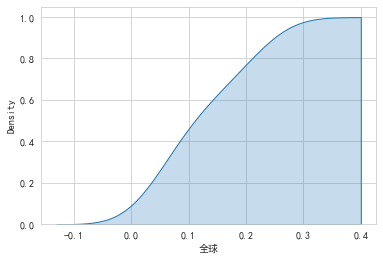

In [55]:
sns.kdeplot(data=df_ng,x='全球',shade=True,cumulative=True)

Text(0.5, 1.0, 'NG')

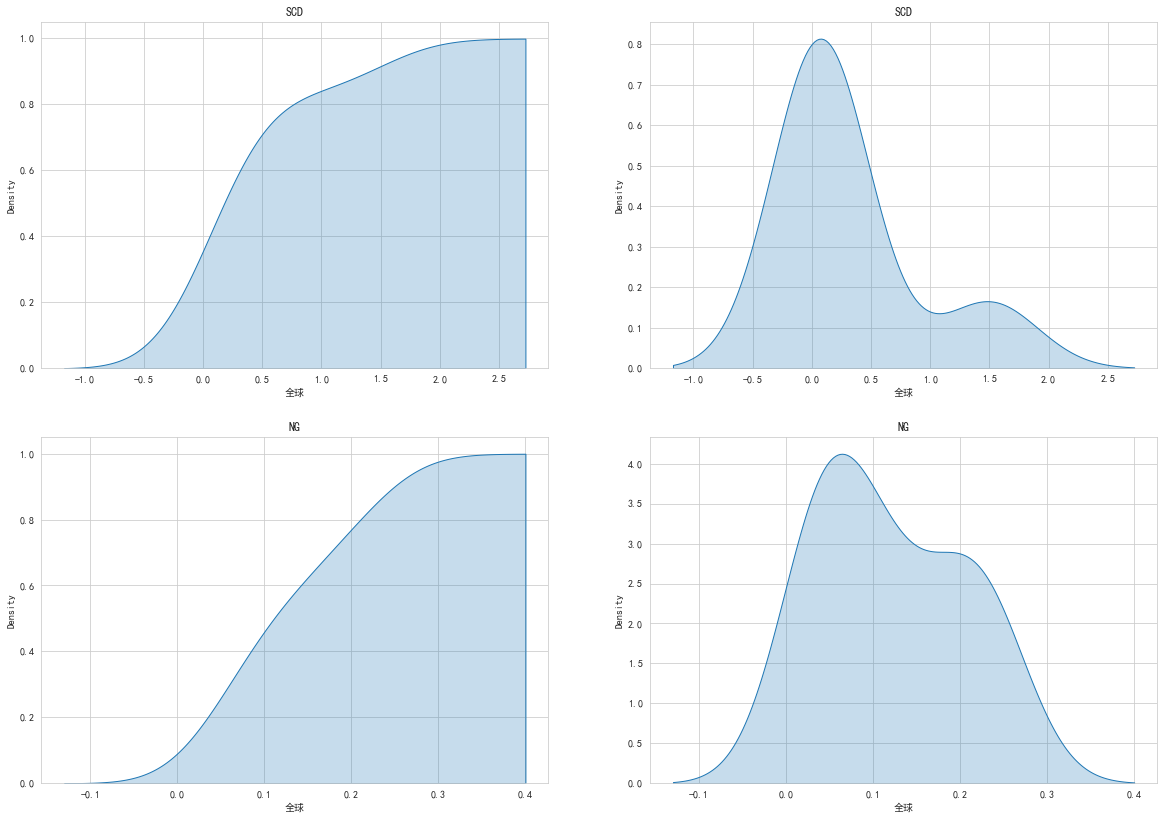

In [56]:
# 标准答案
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'font.sans-serif':['simhei', 'Arial']})
plt.rcParams['axes.unicode_minus'] = False

df = sh
df_scd = df[df['平台']=='SCD']
df_ng = df[df['平台']=='NG']

fig, axs = plt.subplots(2, 2, figsize=(20, 14))
g1=sns.kdeplot( data=df_scd, x='全球', shade=True, cumulative=True, ax=axs[0][0])
g2=sns.kdeplot( data=df_scd, x='全球', shade=True, ax=axs[0][1])
g3=sns.kdeplot( data=df_ng, x='全球', shade=True, cumulative=True, ax=axs[1][0])
g4=sns.kdeplot( data=df_ng, x='全球', shade=True, ax=axs[1][1]);
g1.set_title('SCD')
g2.set_title('SCD')
g3.set_title('NG')
g4.set_title('NG')